# 累计与分组

在对较大的数据进行分析时，一项基本的工作就是有效的数据累计（`summarization`）：  
计算累计（`aggregation`）指标，如 `sum()`、`mean()`、`median()`、`min()` 和 `max()`，其中每一个指标都呈现了大数据集的特征。  
在这一节中，我们将探索 `Pandas` 的累计功能，从类似前面 `NumPy` 数组中的简单操作，到基于 `groupby` 实现的复杂操作。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  img {width:30%; height: 30%;}
</style>

## 1. 行星数据

我们将通过 `Seaborn` 程序库（http://seaborn.pydata.org，详情请参见 4.16节）用一份行星数据来进行演示，其中包含天文学家观测到的围绕恒星运转的行星数据（通常简称为**太阳系外行星**或**外行星**）。  
行星数据可以直接通过 `Seaborn` 下载：数据中包含了截至 2014 年已被发现的一千多颗外行星的资料。

In [3]:
planets = sns.load_dataset('planets')  # 自动从seaborn网站下载数据，可能会很慢
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
# planets.to_csv('../data/seaborn_planets.csv')  # 本地备份一份数据，20210913

## 2. Pandas的简单累计功能

In [7]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [8]:
ser.sum()

2.811925491708157

In [9]:
ser.mean()

0.5623850983416314

In [10]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [11]:
df.mean()  # DataFrame 的累计函数默认对每列进行统计

A    0.477888
B    0.443420
dtype: float64

In [12]:
df.mean(axis='columns')  # 设置 axis 参数，你就可以对每一行进行统计了

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

**Pandas的累计方法**

| 指标 | 描述 |
| -- | -- |
| count() | 计数项 |
| first()、last() | 第一项与最后一项 |
| mean()、median() | 均值与中位数 |
| min()、max() | 最小值与最大值 |
| std()、var() | 标准差与方差 |
| mad() | 均值绝对偏差（mean absolute deviation） |
| prod() | 所有项乘积 |
| sum() | 所有项求和 |

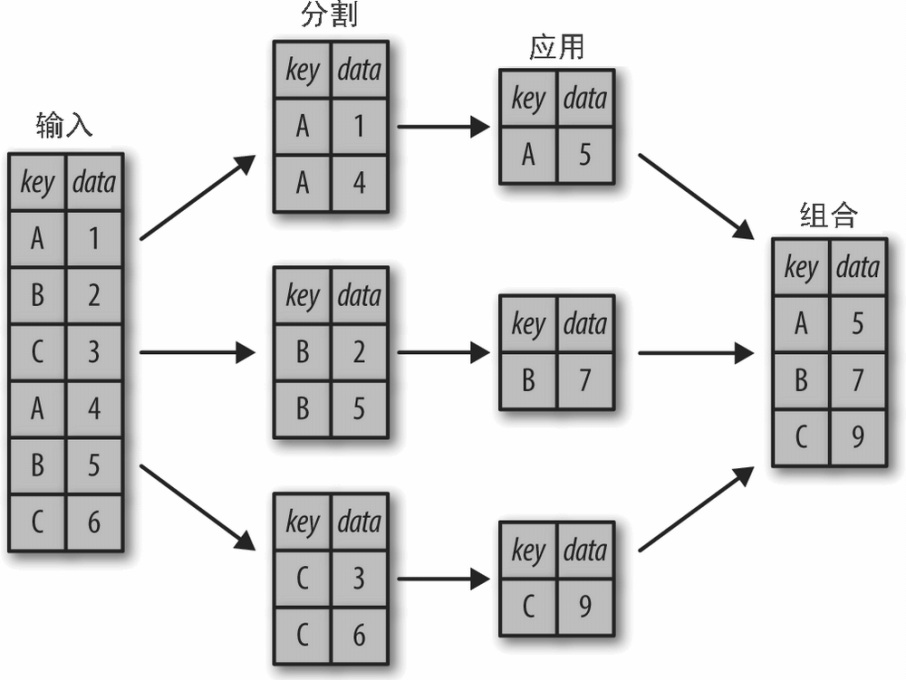